In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

from glob import glob

In [11]:
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [12]:
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16) 

Evaluate __plasmid__ prediction

In [13]:
species = "e_coli"

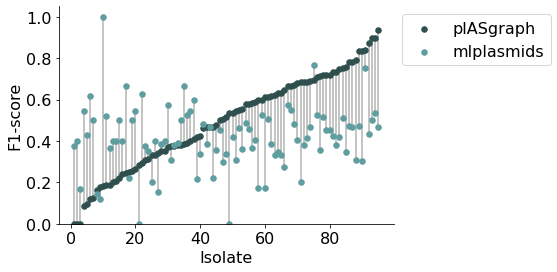

In [14]:
results_e_faecium_plasgraph_plasmid = glob("../results/predictions/*" + species + "*plasmid.csv")
results_e_faecium_mlplasmids_plasmid = glob("../results/mlplasmids_predictions/*" + species + "*plasmid.csv")

plasgraph_df = pd.DataFrame()

for file_ in results_e_faecium_plasgraph_plasmid:
    df = pd.read_csv(file_)
    plasgraph_df = plasgraph_df.append(df)

mlplasmids_df = pd.DataFrame()

for file_ in results_e_faecium_mlplasmids_plasmid:
    df = pd.read_csv(file_)
    mlplasmids_df = mlplasmids_df.append(df)

# generate dataframe containing all approaches
all_df = pd.DataFrame()

plasgraph_df["approach"] = "plasgraph"
all_df = all_df.append(plasgraph_df)
mlplasmids_df["approach"] = "mlplasmids"
all_df = all_df.append(mlplasmids_df)

# calculate number of plasmids
all_df["predicted_plasmids"] = all_df["tp"] + all_df["fp"]
all_df["ground_truth_plasmids"] = all_df["tp"] + all_df["fn"]

# drop unique isolates
all_df = all_df[all_df.duplicated(subset=["isolate"], keep=False)]

all_df.to_csv("../results/predictions_comparison/" + species + "_plasmid.csv", index = False)

# keep only isolates with plasmid for plotting and set NA to 0
all_df = all_df.fillna(0)
all_df = all_df[all_df["ground_truth_plasmids"] != 0]

plasgraph_results = []
mlplasmids_results = []

for isolate in set(all_df["isolate"]):
    plasgraph_results.append(all_df.query("isolate == @isolate and approach == 'plasgraph'")["f1_score"].values[0])
    mlplasmids_results.append(all_df.query("isolate == @isolate and approach == 'mlplasmids'")["f1_score"].values[0])

tpl_list = list(zip(plasgraph_results,mlplasmids_results))
sorted_tpl = sorted(tpl_list, key=lambda tup: tup[0])

x = list(range(1, len(plasgraph_results) + 1))

for idx, tpl in enumerate(sorted_tpl):
    plt.plot([idx+1, idx+1], [min(tpl[0], tpl[1]), max(tpl[0], tpl[1])], "-", c="black", alpha=0.3, zorder=0)

plt.scatter(x, [tpl[0] for tpl in sorted_tpl], label = "plASgraph", s = 30, color="darkslategrey")
plt.scatter(x, [tpl[1] for tpl in sorted_tpl], label = "mlplasmids", s = 30, color="cadetblue")

plt.xlabel('Isolate')
plt.ylabel('F1-score')

plt.ylim(0,1.05)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("../results/figures/" + species + "_f1_comparison_plasmid.png", dpi=600, format="png", bbox_inches="tight")
plt.show()
plt.clf()
plt.close()


In [15]:
print("plAsgraph mean:", all_df[all_df["approach"] == "plasgraph"]["f1_score"].mean())
print("mlplasmids mean:", all_df[all_df["approach"] == "mlplasmids"]["f1_score"].mean())

plAsgraph mean: 0.49258371341998175
mlplasmids mean: 0.41480668097007084


Evaluate __chromosome__ prediction

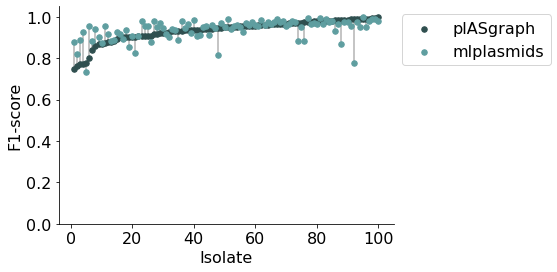

In [16]:
results_e_faecium_plasgraph_plasmid = glob("../results/predictions/*" + species + "*chromosome.csv")
results_e_faecium_mlplasmids_plasmid = glob("../results/mlplasmids_predictions/*" + species + "*chromosome.csv")

plasgraph_df = pd.DataFrame()

for file_ in results_e_faecium_plasgraph_plasmid:
    df = pd.read_csv(file_)
    plasgraph_df = plasgraph_df.append(df)

mlplasmids_df = pd.DataFrame()

for file_ in results_e_faecium_mlplasmids_plasmid:
    df = pd.read_csv(file_)
    mlplasmids_df = mlplasmids_df.append(df)

# generate dataframe containing all approaches
all_df = pd.DataFrame()

plasgraph_df["approach"] = "plasgraph"
all_df = all_df.append(plasgraph_df)
mlplasmids_df["approach"] = "mlplasmids"
all_df = all_df.append(mlplasmids_df)

# calculate number of chromosomes
all_df["predicted_chromosomes"] = all_df["tp"] + all_df["fp"]
all_df["ground_truth_chromosomes"] = all_df["tp"] + all_df["fn"]

# drop unique isolates
all_df = all_df[all_df.duplicated(subset=["isolate"], keep=False)]

all_df.to_csv("../results/predictions_comparison/" + species + "_chromosome.csv", index = False)

all_df = all_df.fillna(0)

plasgraph_results = []
mlplasmids_results = []

for isolate in set(all_df["isolate"]):
    plasgraph_results.append(all_df.query("isolate == @isolate and approach == 'plasgraph'")["f1_score"].values[0])
    mlplasmids_results.append(all_df.query("isolate == @isolate and approach == 'mlplasmids'")["f1_score"].values[0])

tpl_list = list(zip(plasgraph_results,mlplasmids_results))
sorted_tpl = sorted(tpl_list, key=lambda tup: tup[0])

x = list(range(1, len(plasgraph_results) + 1))

for idx, tpl in enumerate(sorted_tpl):
    plt.plot([idx+1, idx+1], [min(tpl[0], tpl[1]), max(tpl[0], tpl[1])], "-", c="black", alpha=0.3, zorder=0)

plt.scatter(x, [tpl[0] for tpl in sorted_tpl], label = "plASgraph", s = 30, color="darkslategrey")
plt.scatter(x, [tpl[1] for tpl in sorted_tpl], label = "mlplasmids", s = 30, color="cadetblue")

plt.xlabel('Isolate')
plt.ylabel('F1-score')

plt.ylim(0,1.05)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("../results/figures/" + species + "_f1_comparison_chromosome.png", dpi=600, format="png", bbox_inches="tight")
plt.show()
plt.clf()
plt.close()

In [17]:
print("plAsgraph mean:", all_df[all_df["approach"] == "plasgraph"]["f1_score"].mean())
print("mlplasmids mean:", all_df[all_df["approach"] == "mlplasmids"]["f1_score"].mean())

plAsgraph mean: 0.9345053787191802
mlplasmids mean: 0.9385629994448174
